Pre processing of the brain MRI images: Intensity normalisation, Bias field correction, Denoising


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from pathlib import Path
from utils import *
from metadata import ImageDataset, patient


notebooks_path = Path.cwd()
repo_path = notebooks_path.parent
print(f'current directory is: {notebooks_path}')

current directory is: d:\VS_Projects\MISA_FINAL_PROJECT\notebooks


In [2]:
#instantiate dataset, specify set name
im_data = ImageDataset('Training')
#check length
print(f'len: {im_data.len}')
#get all ids (useful to iterate over all adataset)
print(f'all ids: {im_data.IDs}')
#get list of all images paths for training
print(f'images paths: {im_data.im_paths()}')
#same for the labels
print(f'images paths: {im_data.labels_paths()}')

len: 10
all ids: ['01', '03', '04', '05', '06', '07', '08', '09', '16', '18']
images paths: ['data\\Training_Set\\IBSR_01\\IBSR_01.nii.gz', 'data\\Training_Set\\IBSR_03\\IBSR_03.nii.gz', 'data\\Training_Set\\IBSR_04\\IBSR_04.nii.gz', 'data\\Training_Set\\IBSR_05\\IBSR_05.nii.gz', 'data\\Training_Set\\IBSR_06\\IBSR_06.nii.gz', 'data\\Training_Set\\IBSR_07\\IBSR_07.nii.gz', 'data\\Training_Set\\IBSR_08\\IBSR_08.nii.gz', 'data\\Training_Set\\IBSR_09\\IBSR_09.nii.gz', 'data\\Training_Set\\IBSR_16\\IBSR_16.nii.gz', 'data\\Training_Set\\IBSR_18\\IBSR_18.nii.gz']
images paths: ['data\\Training_Set\\IBSR_01\\IBSR_01_seg.nii.gz', 'data\\Training_Set\\IBSR_03\\IBSR_03_seg.nii.gz', 'data\\Training_Set\\IBSR_04\\IBSR_04_seg.nii.gz', 'data\\Training_Set\\IBSR_05\\IBSR_05_seg.nii.gz', 'data\\Training_Set\\IBSR_06\\IBSR_06_seg.nii.gz', 'data\\Training_Set\\IBSR_07\\IBSR_07_seg.nii.gz', 'data\\Training_Set\\IBSR_08\\IBSR_08_seg.nii.gz', 'data\\Training_Set\\IBSR_09\\IBSR_09_seg.nii.gz', 'data\\Trainin

selected id: 01


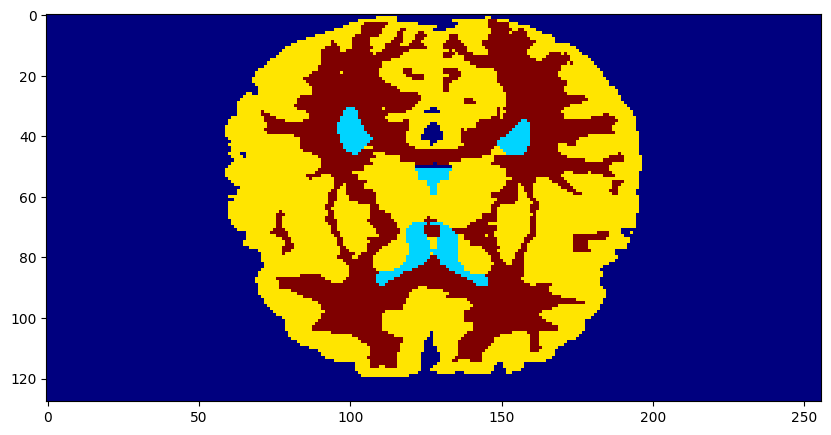

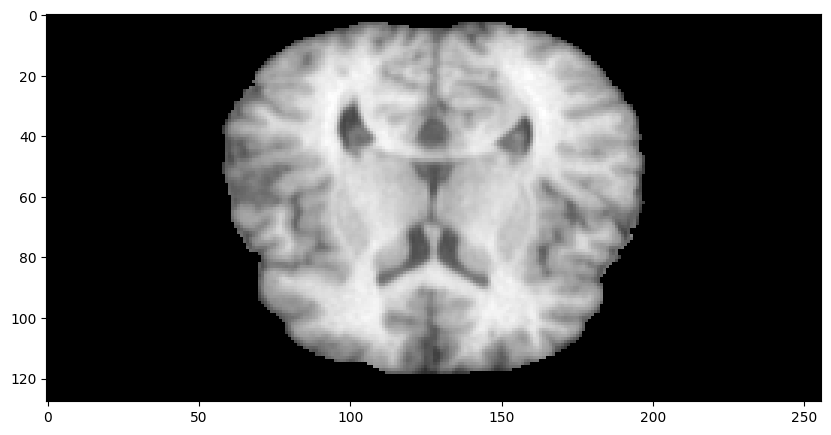

In [3]:
#select one id of patient to check
id = im_data.IDs[0]
print(f'selected id: {id}')
#istantiate patient object using the id and the previous ImageDataset object
pat = patient(id, im_data)
#You can print the image or the labels
pat.show('labels')
pat.show('im')

In [55]:
## Resampling - Preprocessing: Resampling the images to a common voxel spacing

# make a function to resample the images to a common voxel spacing
def resample_image(image, labels, new_spacing=[1, 1, 1]):
    """Resample the image to a common voxel spacing

    Args:
        image (sitk image): image to resample
        new_spacing (list, optional): new voxel spacing. Defaults to [1, 1, 1].

    Returns:
        sitk image: resampled image
    """
    print(f'old image voxel spacing: {image.GetSpacing()}')
    print(f'old image size: {im.GetSize()}')
    print(f'old label voxel spacing: {labels.GetSpacing()}')
    print(f'old label size: {labels.GetSize()}')

    # Set up the resampling filter
    resample = sitk.ResampleImageFilter()
    resample.SetReferenceImage(image)
    resample.SetInterpolator(sitk.sitkLinear)
    resample.SetDefaultPixelValue(0)

    # Set the new voxel spacing
    resample.SetOutputSpacing(new_spacing)

    # Calculate the new size of the image based on the new voxel spacing
    old_spacing = np.array(image.GetSpacing())
    old_size = image.GetSize()
    new_size = np.round(old_size * (old_spacing / new_spacing)).astype(int)
    resample.SetSize(new_size.tolist())

    # Resample the image
    new_image = resample.Execute(image)


    print(f'new image voxel spacing: {new_image.GetSpacing()}')
    print(f'new image size: {new_image.GetSize()}')

    # Resample the labels
    resampled_labels = resample.Execute(labels)
    print(f'new label voxel spacing: {resampled_labels.GetSpacing()}')
    print(f'new label size: {resampled_labels.GetSize()}')

    return new_image

old image voxel spacing: (0.9375, 1.5, 0.9375)
old image size: (256, 128, 256)
old label voxel spacing: (0.9375, 1.5, 0.9375)
old label size: (256, 128, 256)
new image voxel spacing: (1.0, 1.0, 1.0)
new image size: (240, 192, 240)
new label voxel spacing: (1.0, 1.0, 1.0)
new label size: (240, 192, 240)


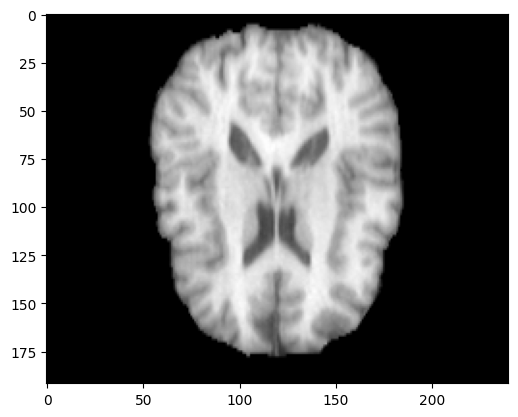

In [56]:
# Select the patient
id = im_data.IDs[0]
pat = patient(id, im_data)

# Get the image and the labels
im = pat.im()
labels = pat.labels()
resampled_im = resample_image(im, labels, new_spacing=[1, 1, 1])
# plot 
plt.imshow(sitk.GetArrayFromImage(resampled_im)[135], cmap='gray')

In [57]:
# save the resampled images
sitk.WriteImage(resampled_im, str(repo_path) + '/data/Training_Set/resampled-images/' + id + '.nii.gz')